In [37]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import sklearn as sk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from typing import List, Tuple

**LEER EL CORPUES Y ALMACENAR EN UNA LISTA**

Creamos una función "read_reuters_files" para leer el corpus para después imprimir la longitud del corpus

In [20]:
def read_reuters_files(directory_path='../data/reuters/test'):
    documents = []
    try:
        for filename in os.listdir(directory_path):
            file_path = os.path.join(directory_path, filename)
        
            if os.path.isfile(file_path):
                try:
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()
                        documents.append((filename, content))
                except Exception as e:
                    print(f"Error reading file {filename}: {str(e)}")
                    
    except Exception as e:
        print(f"Error accessing directory: {str(e)}")
        
    return documents

print("Reading Reuters files...")
print(len(read_reuters_files()))

Reading Reuters files...
Error reading file 17980: 'utf-8' codec can't decode byte 0xfc in position 533: invalid start byte
10787


MANEJAR ERRORES PARA LEER TODOS LOS ARCHIVOS SIN NINGÚN TIPO DE PROBLEMA POR ALGÚN CARACTER

In [21]:
def read_reuters_files(directory_path='../data/reuters/test'):
    documents = []
    try:
        for filename in os.listdir(directory_path):
            file_path = os.path.join(directory_path, filename)
            
            if os.path.isfile(file_path):
                try:
                    with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
                        content = file.read()
                        documents.append((filename, content))
                except Exception as e:
                    print(f"Error reading file {filename}: {str(e)}")
    except Exception as e:
        print(f"Error accessing directory: {str(e)}")
        
    return documents

print("Reading Reuters files...")
print(len(read_reuters_files()))

documents = read_reuters_files()
print(sorted(list(documents))[:3])

Reading Reuters files...
10788
[('1', 'BAHIA COCOA REVIEW\n  Showers continued throughout the week in\n  the Bahia cocoa zone, alleviating the drought since early\n  January and improving prospects for the coming temporao,\n  although normal humidity levels have not been restored,\n  Comissaria Smith said in its weekly review.\n      The dry period means the temporao will be late this year.\n      Arrivals for the week ended February 22 were 155,221 bags\n  of 60 kilos making a cumulative total for the season of 5.93\n  mln against 5.81 at the same stage last year. Again it seems\n  that cocoa delivered earlier on consignment was included in the\n  arrivals figures.\n      Comissaria Smith said there is still some doubt as to how\n  much old crop cocoa is still available as harvesting has\n  practically come to an end. With total Bahia crop estimates\n  around 6.4 mln bags and sales standing at almost 6.2 mln there\n  are a few hundred thousand bags still in the hands of farmers,\n  mi

In [22]:
def load_stop_words(file_path='../data/reuters/stopwords.txt'):
    stop_words = set()
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                # Agregar cada palabra al conjunto
                stop_words.add(line.strip().lower())
    except Exception as e:
        print(f"Error loading stop words: {e}")
        print(stop_words)
    return stop_words


print("Loading stop words...")
print(len(load_stop_words()))

stop_words = load_stop_words()
print("First 10 stop words:", sorted(list(stop_words))[:20])


Loading stop words...
570
First 10 stop words: ['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along']


**PREPOCESO DEL CORPUS**

EXTRAER CONTENIDO RELEVANTE DEL TEXTO Y REALIZAR LIMPIEZA DE DATOS

In [28]:
# Descargar recursos necesarios para NLTK
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt_tab')

def preprocess_text(text, stop_words):
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar etiquetas HTML, si las hay
    text = re.sub(r'<.*?>', '', text)
    
    # Eliminar caracteres especiales y dígitos
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminar palabras vacías
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    tokens = list(dict.fromkeys(tokens))
    
    return tokens

def process_corpus(documents, stop_words):
    processed_documents = []
    diccionario = set()

    for filename, content in documents:
        # Extraer el contenido relevante del documento (en este caso, todo el texto)
        processed_text = preprocess_text(content, stop_words)
        processed_documents.append((filename, processed_text))

        diccionario.update(processed_text)
    
    words_list = sorted(diccionario)

    return processed_documents, words_list

In [38]:
import re

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_text(text: str, stop_words: set) -> List[str]:
    """
    Preprocess text by performing several cleaning and normalization steps.
    
    Args:
        text (str): Input text to be preprocessed
        stop_words (set): Set of stop words to remove
    
    Returns:
        List[str]: Processed and cleaned tokens
    """
    try:
        # Convert to lowercase
        text = text.lower()
        
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        
        # Remove special characters and digits
        text = re.sub(r'[^a-z\s]', '', text)
        
        # Tokenization
        tokens = word_tokenize(text)
        
        # Remove stop words
        tokens = [word for word in tokens if word not in stop_words]
        
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        
        # Remove duplicates while preserving order
        tokens = list(dict.fromkeys(tokens))
        
        return tokens
    
    except Exception as e:
        print(f"Error in text preprocessing: {e}")
        return []

def process_corpus(documents: List[Tuple[str, str]], stop_words: set) -> Tuple[List[Tuple[str, List[str]]], List[str]]:
    processed_documents = []
    dictionary = set()
    
    for filename, content in documents:
        processed_text = preprocess_text(content, stop_words)
        processed_documents.append((filename, processed_text))
        dictionary.update(processed_text)
    
    words_list = sorted(dictionary)
    return processed_documents, words_list

stop_words = load_stop_words()

# Leer los archivos del corpus
documents = read_reuters_files()

processed_docs, unique_words = process_corpus(documents, stop_words)

print("Processed Documents:")
for filename, tokens in processed_docs:
    print(f"{filename}: {tokens}")

print("\nUnique Words:")
print(unique_words)

Processed Documents:
1: ['bahia', 'cocoa', 'review', 'shower', 'continued', 'week', 'zone', 'alleviating', 'drought', 'early', 'january', 'improving', 'prospect', 'coming', 'temporao', 'normal', 'humidity', 'level', 'restored', 'comissaria', 'smith', 'weekly', 'dry', 'period', 'mean', 'late', 'year', 'arrival', 'ended', 'february', 'bag', 'kilo', 'making', 'cumulative', 'total', 'season', 'mln', 'stage', 'delivered', 'earlier', 'consignment', 'included', 'figure', 'doubt', 'crop', 'harvesting', 'practically', 'end', 'estimate', 'sale', 'standing', 'hundred', 'thousand', 'hand', 'farmer', 'middleman', 'exporter', 'processor', 'fit', 'export', 'shipper', 'experiencing', 'dificulties', 'obtaining', 'superior', 'certificate', 'view', 'lower', 'quality', 'recent', 'sold', 'good', 'part', 'held', 'spot', 'bean', 'price', 'rose', 'cruzados', 'arroba', 'reluctant', 'offer', 'nearby', 'shipment', 'limited', 'booked', 'march', 'dlrs', 'tonne', 'port', 'named', 'light', 'open', 'junejuly', 'york'

In [36]:
stop_words = load_stop_words()

# Leer los archivos del corpus
documents = read_reuters_files()

# Preprocesar los documentos
processed_corpus, words_list = process_corpus(documents, stop_words)

# Mostrar palabras tokenizadas

print(f"Ejemplo de texto procesado (primer documento): {processed_corpus[0][1][:20]}")
print(len(words_list))
print(f"Listado de palabras tokenizadas: {words_list[:20]}")  # Primeros 20 tokens procesados

Ejemplo de texto procesado (primer documento): ['bahia', 'cocoa', 'review', 'shower', 'continued', 'week', 'zone', 'alleviating', 'drought', 'early', 'january', 'improving', 'prospect', 'coming', 'temporao', 'normal', 'humidity', 'level', 'restored', 'comissaria']
31603
Listado de palabras tokenizadas: ['aa', 'aaa', 'aabex', 'aachener', 'aaminus', 'aancor', 'aap', 'aaplus', 'aaps', 'aar', 'aarnoud', 'aaron', 'aart', 'ab', 'ababa', 'abalkhail', 'abandon', 'abandoned', 'abandoning', 'abandonment']


GUARDAR LAS PALABRAS TOKENIZADAS EN UN DOCUMENTO DE TEXTO

In [33]:
# Guardar las palabras tokenizadas en un archivo de texto
with open('tokenized_words.txt', 'w', encoding='utf-8') as file:
    for word in words_list:
        file.write(word + '\n')

print("Palabras tokenizadas guardadas en 'tokenized_words.txt'")

Palabras tokenizadas guardadas en 'tokenized_words.txt'


In [35]:
def vectorize_bow(processed_corpus):
    # Convertir el corpus procesado en una lista de textos
    corpus_texts = [" ".join(doc[1]) for doc in processed_corpus]
    
    # Crear el modelo de Bag of Words
    vectorizer = CountVectorizer()
    X_bow = vectorizer.fit_transform(corpus_texts)
    
    return X_bow, vectorizer

# Vectorizar usando Bag of Words
X_bow, bow_vectorizer = vectorize_bow(processed_corpus)
print("Bag of Words representation (first document):")
print(X_bow[0].toarray())


Bag of Words representation (first document):
[[0 0 0 ... 0 0 0]]


In [40]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords

# Asegúrate de tener estas descargas
nltk.download('punkt')

class TextVectorizer:
    def __init__(self, documents, stop_words=None):
        """
        Inicialización del vectorizador de texto
        
        Args:
        - documents: Lista de documentos (texto plano)
        - stop_words: Conjunto de palabras vacías
        """
        self.documents = documents
        self.stop_words = stop_words or set(stopwords.words('spanish'))
    
    def bag_of_words(self, max_features=1000):
        """
        Vectorización usando Bag of Words
        
        Args:
        - max_features: Número máximo de características
        
        Returns:
        - Matriz de vectores BoW
        - Vocabulario
        """
        # Configurar vectorizador
        vectorizer = CountVectorizer(
            stop_words=list(self.stop_words),
            max_features=max_features
        )
        
        # Transformar documentos
        bow_matrix = vectorizer.fit_transform(self.documents)
        
        return {
            'matrix': bow_matrix.toarray(),
            'vocabulary': vectorizer.get_feature_names_out(),
            'vectorizer': vectorizer
        }
    
    def tf_idf(self, max_features=1000):
        """
        Vectorización usando TF-IDF
        
        Args:
        - max_features: Número máximo de características
        
        Returns:
        - Matriz de vectores TF-IDF
        - Vocabulario
        """
        # Configurar vectorizador TF-IDF
        vectorizer = TfidfVectorizer(
            stop_words=list(self.stop_words),
            max_features=max_features
        )
        
        # Transformar documentos
        tfidf_matrix = vectorizer.fit_transform(self.documents)
        
        return {
            'matrix': tfidf_matrix.toarray(),
            'vocabulary': vectorizer.get_feature_names_out(),
            'vectorizer': vectorizer
        }
    
    def word2vec(self, vector_size=100, window=5, min_count=1):
        """
        Vectorización usando Word2Vec
        
        Args:
        - vector_size: Dimensionalidad de los vectores
        - window: Contexto de palabras
        - min_count: Frecuencia mínima de palabras
        
        Returns:
        - Modelo Word2Vec
        - Matriz de vectores promedio de documentos
        """
        # Tokenizar documentos
        tokenized_docs = [
            nltk.word_tokenize(doc.lower()) 
            for doc in self.documents
        ]
        
        # Entrenar modelo Word2Vec
        model = Word2Vec(
            sentences=tokenized_docs, 
            vector_size=vector_size, 
            window=window, 
            min_count=min_count
        )
        
        # Calcular vector promedio por documento
        doc_vectors = []
        for doc in tokenized_docs:
            doc_vector = np.zeros(vector_size)
            count = 0
            for word in doc:
                if word in model.wv.key_to_index:
                    doc_vector += model.wv[word]
                    count += 1
            
            # Promedio de vectores
            if count > 0:
                doc_vector /= count
            
            doc_vectors.append(doc_vector)
        
        return {
            'model': model,
            'doc_vectors': np.array(doc_vectors)
        }

# Ejemplo de uso
documentos = [
    "El gato duerme en el sofá",
    "El perro juega en el jardín",
    "El gato y el perro son animales domésticos"
]

# Inicializar vectorizador
vectorizador = TextVectorizer(documentos)

# Bag of Words
bow_result = vectorizador.bag_of_words()
print("\n--- Bag of Words ---")
print("Matriz BoW:")
print(bow_result['matrix'])
print("\nVocabulario BoW:")
print(bow_result['vocabulary'])

# TF-IDF
tfidf_result = vectorizador.tf_idf()
print("\n--- TF-IDF ---")
print("Matriz TF-IDF:")
print(tfidf_result['matrix'])
print("\nVocabulario TF-IDF:")
print(tfidf_result['vocabulary'])

# Word2Vec
word2vec_result = vectorizador.word2vec()
print("\n--- Word2Vec ---")
print("Vectores de documentos:")
print(word2vec_result['doc_vectors'])


--- Bag of Words ---
Matriz BoW:
[[0 0 1 1 0 0 0 1]
 [0 0 0 0 1 1 1 0]
 [1 1 0 1 0 0 1 0]]

Vocabulario BoW:
['animales' 'domésticos' 'duerme' 'gato' 'jardín' 'juega' 'perro' 'sofá']

--- TF-IDF ---
Matriz TF-IDF:
[[0.         0.         0.62276601 0.4736296  0.         0.
  0.         0.62276601]
 [0.         0.         0.         0.         0.62276601 0.62276601
  0.4736296  0.        ]
 [0.5628291  0.5628291  0.         0.42804604 0.         0.
  0.42804604 0.        ]]

Vocabulario TF-IDF:
['animales' 'domésticos' 'duerme' 'gato' 'jardín' 'juega' 'perro' 'sofá']

--- Word2Vec ---
Vectores de documentos:
[[ 1.27308692e-03  3.24112013e-03  2.07081068e-03  1.71412058e-03
  -2.15917636e-03 -4.01300952e-03  1.09267609e-03  6.49450448e-03
  -3.45223746e-03 -3.52417033e-03  5.47370315e-03 -4.32190757e-04
   1.82749519e-03 -5.78518181e-06  2.69328128e-03 -2.10849743e-03
   3.14912673e-03 -4.60343474e-04 -5.75712475e-03 -5.67433316e-03
   3.32426474e-04 -1.33717068e-03  4.65053456e-03 -1.5

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TOKENIZAR

C:\Users\carlo\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\carlo\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\carlo\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\carlo\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(



--- Resultados para BOW ---
Estadísticas de Vocabulario:
total_terms: 18
term_lengths: [8, 10, 5, 7, 7, 9, 10, 5, 11, 11, 11, 12, 8, 7, 7, 9, 10, 10]
avg_term_length: 8.722222222222221
unique_terms: 18

Matriz de Vectores (primeras 2 filas):
[[1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1]]

--- Resultados para TFIDF ---
Estadísticas de Vocabulario:
total_terms: 18
term_lengths: [8, 10, 5, 7, 7, 9, 10, 5, 11, 11, 11, 12, 8, 7, 7, 9, 10, 10]
avg_term_length: 8.722222222222221
unique_terms: 18

Matriz de Vectores (primeras 2 filas):
[[0.56801408 0.         0.         0.45827018 0.         0.
  0.         0.38040565 0.         0.         0.56801408 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.5
  0.         0.         0.         0.         0.5        0.5       ]]

--- Resultados para WORD2VEC ---
Estadísticas de Voc

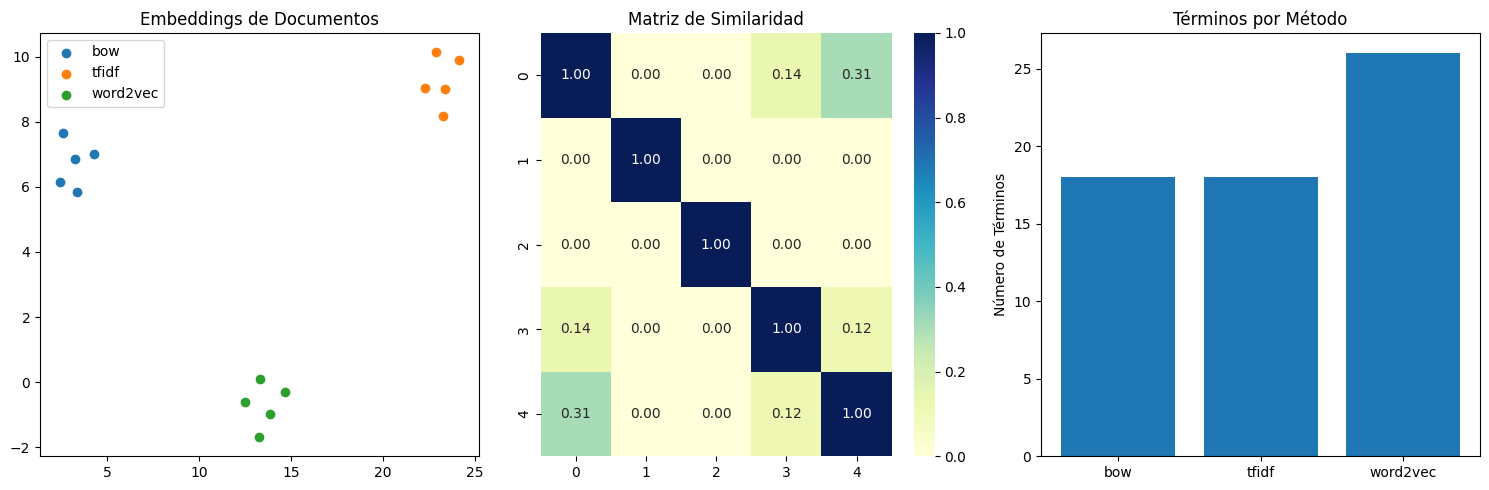


=== ANÁLISIS COMPARATIVO DE TÉCNICAS DE VECTORIZACIÓN ===

1. Dimensionalidad:
BOW: (5, 18)
TFIDF: (5, 18)
WORD2VEC: (5, 100)

2. Similaridad entre Documentos:

BOW:
  Promedio de similaridad: 0.2737
  Máxima similaridad: 1.0000
  Mínima similaridad: 0.0000

TFIDF:
  Promedio de similaridad: 0.2452
  Máxima similaridad: 1.0000
  Mínima similaridad: 0.0000

WORD2VEC:
  Promedio de similaridad: 0.3681
  Máxima similaridad: 1.0000
  Mínima similaridad: 0.1016

3. Características del Vocabulario:

BOW:
  Términos totales: 18
  Longitud media de términos: 8.72

TFIDF:
  Términos totales: 18
  Longitud media de términos: 8.72

WORD2VEC:
  Términos totales: 26
  Longitud media de términos: 6.69


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import umap.umap_ as umap

class VectorizationEvaluator:
    def __init__(self, documents, stop_words=None):
        """
        Inicialización del evaluador de vectorización
        
        Args:
        - documents: Lista de documentos (texto plano)
        - stop_words: Conjunto de palabras vacías
        """
        self.documents = documents
        self.stop_words = stop_words or set(stopwords.words('spanish'))
    
    def vectorize(self, method='bow', **kwargs):
        """
        Vectorizar documentos usando diferentes métodos
        
        Args:
        - method: Método de vectorización ('bow', 'tfidf', 'word2vec')
        - kwargs: Parámetros adicionales para cada método
        
        Returns:
        - Matriz de vectores
        - Vocabulario
        """
        if method == 'bow':
            vectorizer = CountVectorizer(
                stop_words=list(self.stop_words),
                max_features=kwargs.get('max_features', 1000)
            )
            matrix = vectorizer.fit_transform(self.documents).toarray()
            vocab = vectorizer.get_feature_names_out()
        
        elif method == 'tfidf':
            vectorizer = TfidfVectorizer(
                stop_words=list(self.stop_words),
                max_features=kwargs.get('max_features', 1000)
            )
            matrix = vectorizer.fit_transform(self.documents).toarray()
            vocab = vectorizer.get_feature_names_out()
        
        elif method == 'word2vec':
            # Tokenizar documentos
            tokenized_docs = [
                nltk.word_tokenize(doc.lower()) 
                for doc in self.documents
            ]
            
            # Entrenar modelo Word2Vec
            model = Word2Vec(
                sentences=tokenized_docs, 
                vector_size=kwargs.get('vector_size', 100), 
                window=kwargs.get('window', 5), 
                min_count=kwargs.get('min_count', 1)
            )
            
            # Calcular vector promedio por documento
            matrix = []
            for doc in tokenized_docs:
                doc_vector = np.zeros(model.vector_size)
                count = 0
                for word in doc:
                    if word in model.wv.key_to_index:
                        doc_vector += model.wv[word]
                        count += 1
                
                # Promedio de vectores
                if count > 0:
                    doc_vector /= count
                
                matrix.append(doc_vector)
            
            matrix = np.array(matrix)
            vocab = list(model.wv.key_to_index.keys())
        
        return matrix, vocab
    
    def evaluate_similarity(self, matrix):
        """
        Calcular similaridad de coseno entre documentos
        
        Args:
        - matrix: Matriz de vectores
        
        Returns:
        - Matriz de similaridad
        """
        return cosine_similarity(matrix)
    
    def visualize_embeddings(self, matrix, method='pca'):
        """
        Visualizar embeddings en 2D
        
        Args:
        - matrix: Matriz de vectores
        - method: Método de reducción de dimensionalidad
        
        Returns:
        - Coordenadas 2D
        """
        if method == 'pca':
            reducer = PCA(n_components=2)
        elif method == 'umap':
            reducer = umap.UMAP(n_components=2)
        
        # Reducir dimensionalidad
        coords = reducer.fit_transform(matrix)
        return coords
    
    def analyze_vocabulary(self, vocab):
        """
        Analizar características del vocabulario
        
        Args:
        - vocab: Vocabulario de términos
        
        Returns:
        - Diccionario con estadísticas del vocabulario
        """
        return {
            'total_terms': len(vocab),
            'term_lengths': [len(term) for term in vocab],
            'avg_term_length': np.mean([len(term) for term in vocab]),
            'unique_terms': len(set(vocab))
        }
    
    def comprehensive_evaluation(self, methods=['bow', 'tfidf', 'word2vec']):
        """
        Evaluación completa de métodos de vectorización
        
        Args:
        - methods: Lista de métodos a evaluar
        
        Returns:
        - Resultados de evaluación
        """
        results = {}
        
        for method in methods:
            # Vectorizar
            matrix, vocab = self.vectorize(method)
            
            # Similaridad
            similarity_matrix = self.evaluate_similarity(matrix)
            
            # Visualización
            coords = self.visualize_embeddings(matrix, 'umap')
            
            # Análisis de vocabulario
            vocab_stats = self.analyze_vocabulary(vocab)
            
            # Guardar resultados
            results[method] = {
                'matrix': matrix,
                'vocab': vocab,
                'similarity_matrix': similarity_matrix,
                'embedding_coords': coords,
                'vocab_stats': vocab_stats
            }
        
        return results
    
    def plot_results(self, results):
        """
        Graficar resultados de evaluación
        
        Args:
        - results: Resultados de evaluación
        """
        plt.figure(figsize=(15, 5))
        
        # Gráfico de dispersión de embeddings
        plt.subplot(131)
        for method, data in results.items():
            plt.scatter(
                data['embedding_coords'][:, 0], 
                data['embedding_coords'][:, 1], 
                label=method
            )
        plt.title('Embeddings de Documentos')
        plt.legend()
        
        # Heatmap de similaridad
        plt.subplot(132)
        sns.heatmap(
            results['tfidf']['similarity_matrix'], 
            cmap='YlGnBu', 
            annot=True, 
            fmt='.2f'
        )
        plt.title('Matriz de Similaridad')
        
        # Estadísticas de vocabulario
        plt.subplot(133)
        vocab_stats = [
            results[method]['vocab_stats']['total_terms'] 
            for method in results.keys()
        ]
        plt.bar(results.keys(), vocab_stats)
        plt.title('Términos por Método')
        plt.ylabel('Número de Términos')
        
        plt.tight_layout()
        plt.show()

# Ejemplo de uso
documentos = [
    "El análisis de datos es fundamental en ciencia",
    "La inteligencia artificial transforma la tecnología",
    "Los modelos de machine learning son complejos",
    "La estadística ayuda a comprender los datos",
    "La ciencia de datos combina múltiples disciplinas"
]

# Inicializar evaluador
evaluador = VectorizationEvaluator(documentos)

# Realizar evaluación completa
resultados = evaluador.comprehensive_evaluation()

# Imprimir resultados detallados
for metodo, datos in resultados.items():
    print(f"\n--- Resultados para {metodo.upper()} ---")
    print("Estadísticas de Vocabulario:")
    for stat, valor in datos['vocab_stats'].items():
        print(f"{stat}: {valor}")
    
    print("\nMatriz de Vectores (primeras 2 filas):")
    print(datos['matrix'][:2])

# Graficar resultados
evaluador.plot_results(resultados)

# Análisis comparativo detallado
def analisis_comparativo(resultados):
    print("\n=== ANÁLISIS COMPARATIVO DE TÉCNICAS DE VECTORIZACIÓN ===")
    
    # Comparación de dimensionalidad
    print("\n1. Dimensionalidad:")
    for metodo, datos in resultados.items():
        print(f"{metodo.upper()}: {datos['matrix'].shape}")
    
    # Análisis de similaridad
    print("\n2. Similaridad entre Documentos:")
    for metodo, datos in resultados.items():
        sim_matrix = datos['similarity_matrix']
        print(f"\n{metodo.upper()}:")
        print(f"  Promedio de similaridad: {np.mean(sim_matrix):.4f}")
        print(f"  Máxima similaridad: {np.max(sim_matrix):.4f}")
        print(f"  Mínima similaridad: {np.min(sim_matrix):.4f}")
    
    # Análisis de vocabulario
    print("\n3. Características del Vocabulario:")
    for metodo, datos in resultados.items():
        vocab_stats = datos['vocab_stats']
        print(f"\n{metodo.upper()}:")
        print(f"  Términos totales: {vocab_stats['total_terms']}")
        print(f"  Longitud media de términos: {vocab_stats['avg_term_length']:.2f}")

# Ejecutar análisis comparativo
analisis_comparativo(resultados)